### Aplicação conhecimentos de limpeza e organização de dados (data cleaning & data wrangling) para estruturar uma base de dados para modelagem.

Contexto
Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.
A saber RFM:
- R (Recency): Tempo que o cliente realizou a última compra (em dias)
- F (Frequency): Quantidade de compras realizadas pelo cliente
- M (Monetary): Valor do ticket médio gasto pelo cliente onde ticket médio = média do total gasto por pedido para cada cliente.

Para análise, uma base de dados (arquivo csv)

## Sobre os dados
A tabela contém informações de compras de um e-commerce em 37 países. Contém a
identificação do cliente e os dados da compra.
- CustomerID: Código de identificação do cliente
- Description: Descrição do produto
- InvoiceNo: Código da fatura
- StockCode: Código de estoque do produto
- Quantity: Quantidade do produto
- InvoiceDate: Data do faturamento (compra)
- UnitPrice: Preço unitário do produto
- Country: País da compra

Instalando e Importando bibliotecas


In [ ]:
!pip install sidetable
!pip install pandas-profiling==3.3.0

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets
from sklearn.preprocessing import scale

#01 - Leitura do arquivo e inspecione os dados

In [ ]:
# Read dataset
df = pd.read_csv('/content/data.csv', sep = ',', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#02 - Valores faltantes na identificação do cliente

Identificando a quantidade de dados nulos

In [ ]:
df_missing = (df.isna().sum()
.to_frame('missing_count')
.join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
.sort_values('missing_count', ascending = False)
)

df_missing.style.format('{:.2%}', subset = ['missing_pct'])

,missing_count,missing_pct
CustomerID,135080,24.93%
Description,1454,0.27%
InvoiceNo,0,0.00%
StockCode,0,0.00%
Quantity,0,0.00%
InvoiceDate,0,0.00%
UnitPrice,0,0.00%
Country,0,0.00%


Utilizando a biblioteca sidetable

In [ ]:
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


Utilizando a biblioteca missgno pata visualização

<AxesSubplot:>

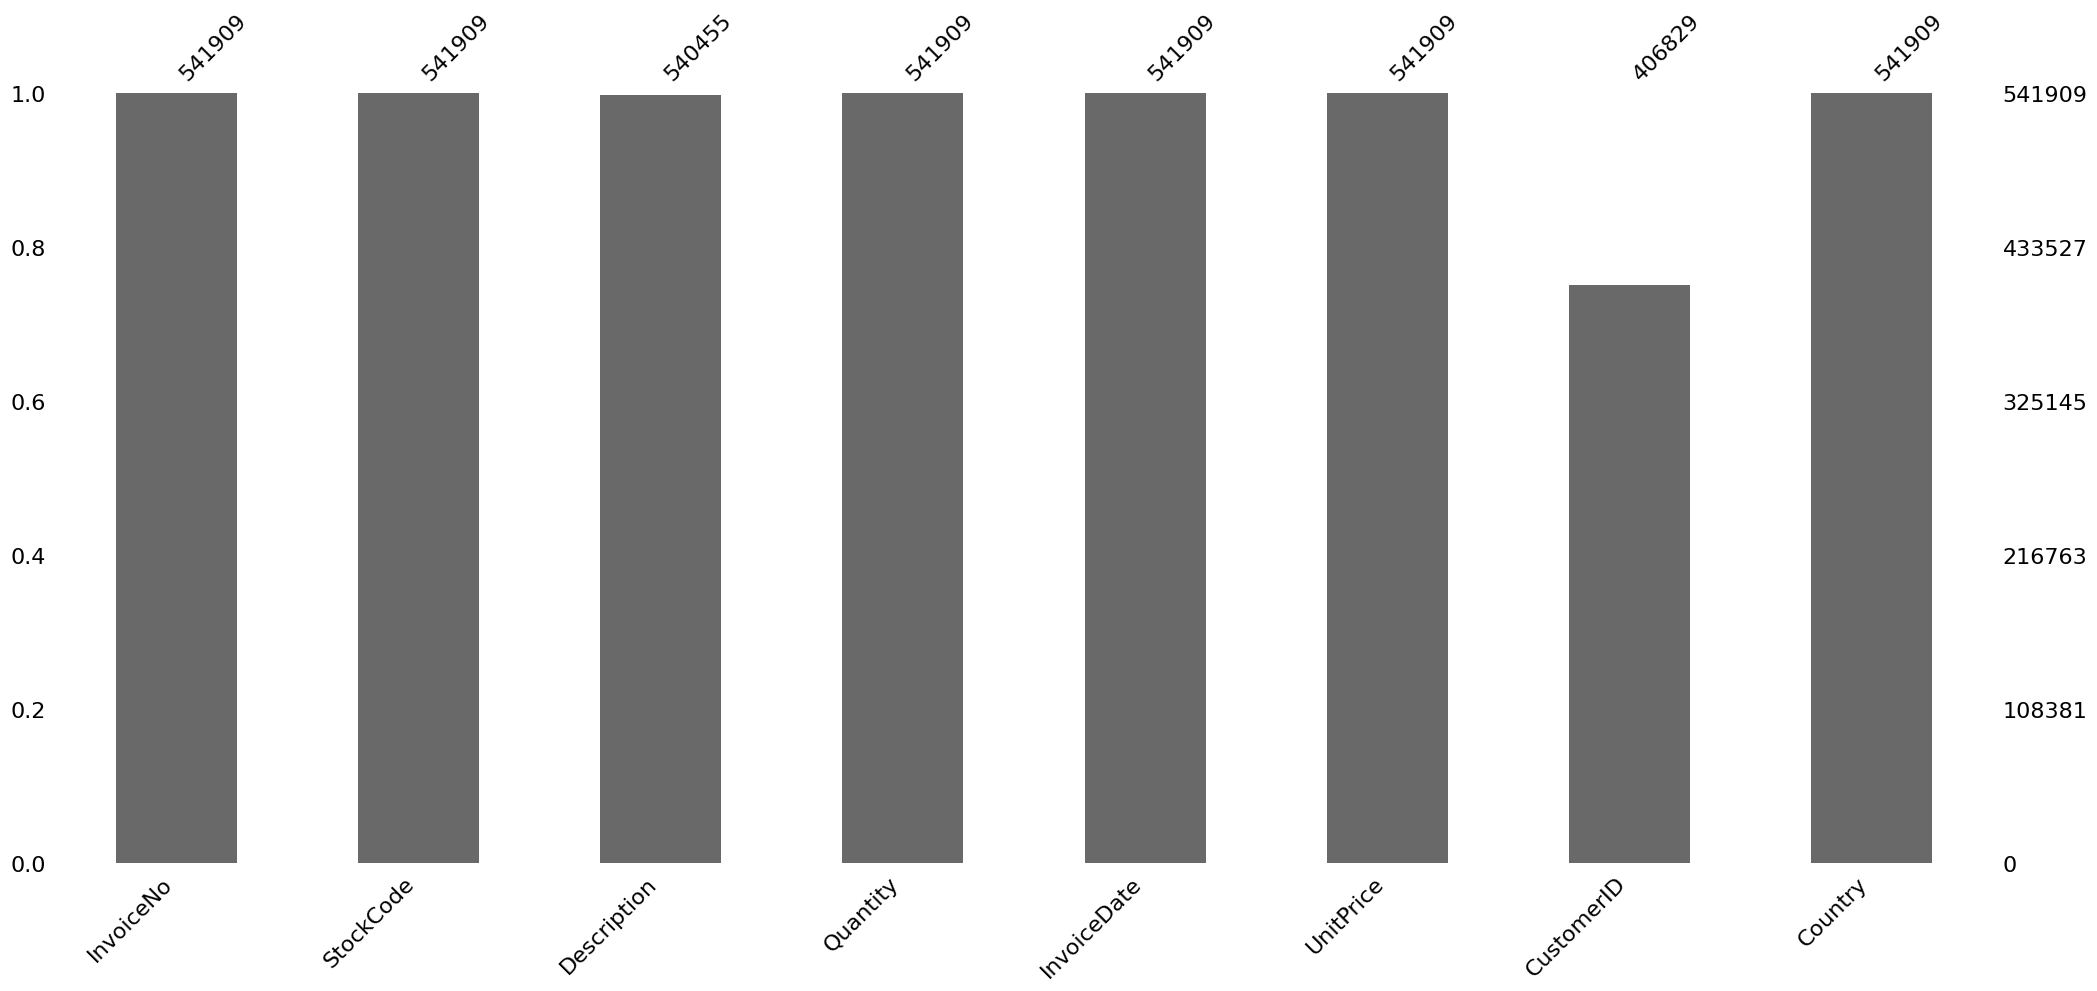

In [ ]:
msno.bar(df)

Mostrando as linhas que possuem dados faltantes

In [ ]:
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


Removendo linhas com valores nulos

In [ ]:
df_semNulos = df.dropna(subset=['CustomerID'])
df_semNulos

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#03 - Preços unitários e quantidade de produtos iguais ou inferior a 0

Filtro para verificar valores menores ou iguais a zero. Dataframe criado sem as linhas com essa condição

In [ ]:
df_filtrado = df_semNulos[(df_semNulos.UnitPrice>0) & (df_semNulos.Quantity>0)]
df_filtrado

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


#04 - Verificação de linhas duplicadas

Identificando se existem valores duplicados

In [ ]:
df_filtrado[df_filtrado.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Remover valores duplicados
df_filtrado.drop_duplicates(keep=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df_noDuplicated = df_filtrado.drop_duplicates(keep=False)

In [ ]:
df_noDuplicated.shape

(387883, 8)

#05 - Tipos de dados da coluna

Tratando o tipo de dados das colunas CustomerID (int) e InvoiceDate (datetime)

In [ ]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


In [ ]:
df_filtrado['CustomerID'] = df_filtrado['CustomerID'].astype(int)

<ipython-input-156-1007ccaeb5df>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_filtrado['InvoiceDate'] = pd.to_datetime(df_filtrado['InvoiceDate'])

<ipython-input-157-dd55a8b867c7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_filtrado

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


#06 - Removendo Outliers

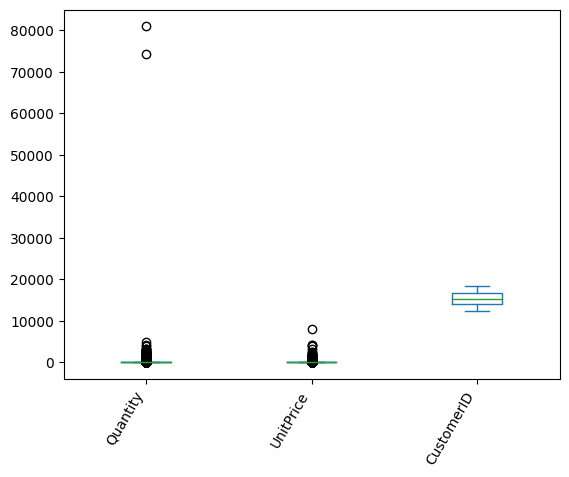

In [ ]:
df_filtrado.plot.box()
plt.xticks(rotation=60, ha='right');

<AxesSubplot:>

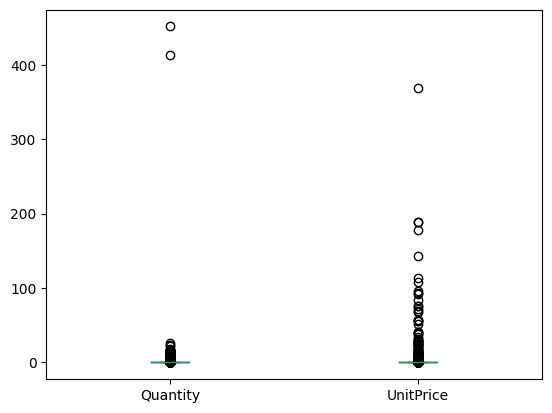

In [ ]:
# Box plot com dados padronizados
df_filtrado.loc[:, ['Quantity', 'UnitPrice']].apply(scale).plot.box()

In [ ]:
#Função para filtrar os outliers de acordo com o limite exigido para as colunas de Quantity e UnitPrice
def remove_outlier(dataframe, columns, limit):
    for col in columns:
        upper_limit = limit
        # Remove linhas com valores fora dos limites
        df_noOutlier = (df[col] <= upper_limit)

    return df_noOutlier

<ipython-input-162-587daf74538e>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-162-587daf74538e>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<AxesSubplot:>

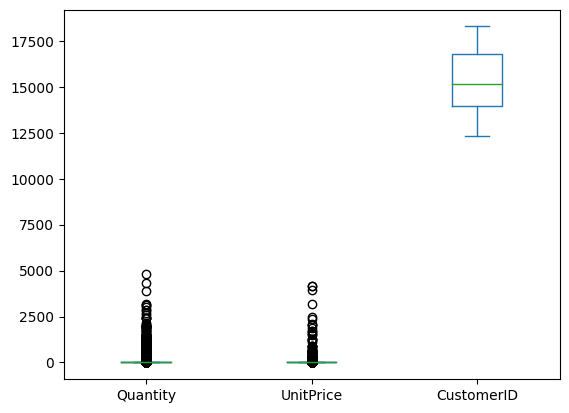

In [ ]:
df_NoOutlier = df_filtrado[remove_outlier(df_filtrado, ['Quantity'], 10000.)]
df_NoOutlier = df_NoOutlier[remove_outlier(df_NoOutlier, ['UnitPrice'], 5000.)]
df_NoOutlier.plot.box()

In [ ]:
df_NoOutlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


#07 - Criação de coluna adicional

Criando uma coluna adicional com o preço total da compra

In [ ]:
df_NoOutlier['TotalValue'] = df_NoOutlier['Quantity'] * df_NoOutlier['UnitPrice']
df_NoOutlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


#08 - Última data

Valor da data mais recente


In [ ]:
df_NoOutlier['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
lastData = df_NoOutlier['InvoiceDate'].max()

#09 - Plotando gráficos

Top 10 países com maior valor em vendas

In [ ]:
df_NoOutlier.groupby(['Country'])[['TotalValue']].sum().sort_values('TotalValue', ascending = False).head(10)

,TotalValue
Country,
United Kingdom,7054595.604
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


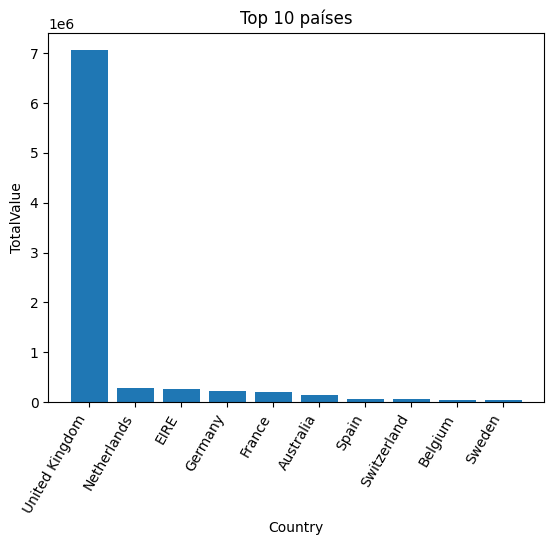

In [ ]:
df2Plot = df_NoOutlier.groupby(['Country'])[['TotalValue']].sum().sort_values('TotalValue', ascending = False).head(10).reset_index()

# Plotar gráfico de barras
plt.bar(df2Plot['Country'], df2Plot['TotalValue'])

# Adicionar rótulos e título
plt.xlabel('Country')
plt.ylabel('TotalValue')
plt.title('Top 10 países')
plt.xticks(rotation=60, ha='right')

# Exibir o gráfico
plt.show()

Top 10 produtos mais vendidos

In [ ]:
df_NoOutlier.groupby(['Description'])[['Quantity']].sum().sort_values('Quantity', ascending = False).head(10).reset_index()

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1,JUMBO BAG RED RETROSPOT,46181
2,WHITE HANGING HEART T-LIGHT HOLDER,36725
3,ASSORTED COLOUR BIRD ORNAMENT,35362
4,PACK OF 72 RETROSPOT CAKE CASES,33693
5,POPCORN HOLDER,30931
6,RABBIT NIGHT LIGHT,27202
7,MINI PAINT SET VINTAGE,26076
8,PACK OF 12 LONDON TISSUES,25345
9,PACK OF 60 PINK PAISLEY CAKE CASES,24264


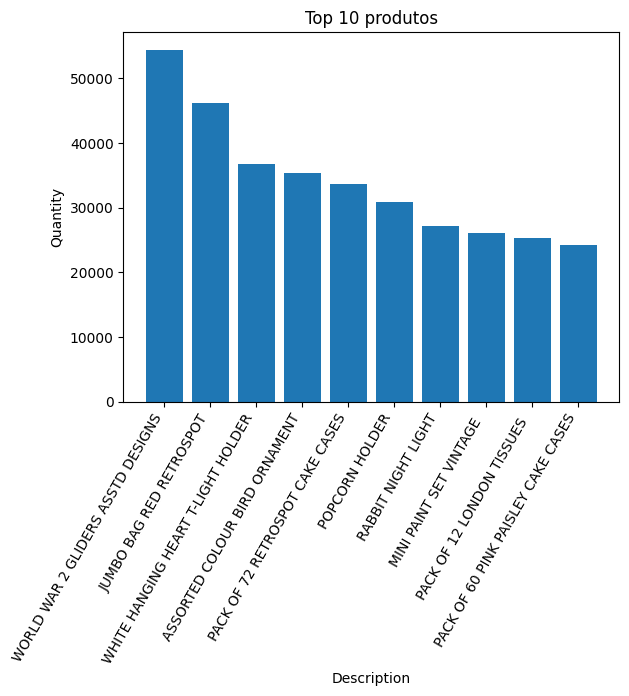

In [ ]:
df2Plot = df_NoOutlier.groupby(['Description'])[['Quantity']].sum().sort_values('Quantity', ascending = False).head(10).reset_index()

# Plotar gráfico de barras
plt.bar(df2Plot['Description'], df2Plot['Quantity'])

# Adicionar rótulos e título
plt.xlabel('Description')
plt.ylabel('Quantity')
plt.title('Top 10 produtos')
plt.xticks(rotation=60, ha='right')

# Exibir o gráfico
plt.show()

Valor de venda total por mês

In [ ]:
df_NoOutlier['Month'] = df_NoOutlier['InvoiceDate'].dt.month
df_NoOutlier['Year'] = df_NoOutlier['InvoiceDate'].dt.year

df_NoOutlier.groupby(['Month','Year'])[['TotalValue']].sum().sort_values('Year').reset_index()

,Month,Year,TotalValue
0,12,2010,572713.890
1,1,2011,492261.440
2,2,2011,447137.350
3,3,2011,595500.760
4,4,2011,469200.361
5,5,2011,670451.810
6,6,2011,661213.690
7,7,2011,600091.011
8,8,2011,645343.900
9,9,2011,952838.382


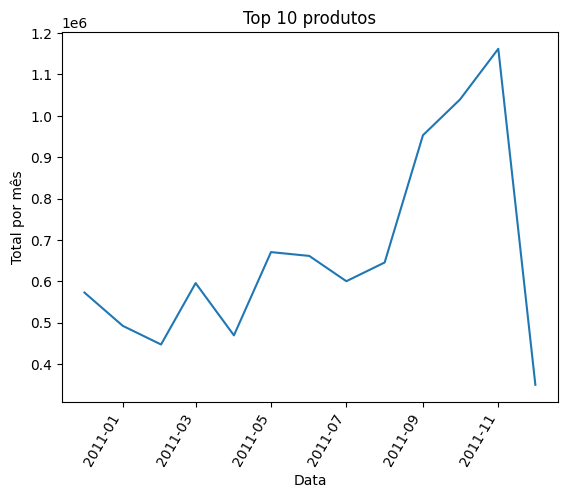

In [ ]:
df2Plot = df_NoOutlier.groupby(['Month', 'Year'])[['TotalValue']].sum().sort_values('Year').reset_index()

df2Plot['Data'] = df2Plot.apply(lambda row: pd.to_datetime(f"{int(row['Year'])}-{int(row['Month'])}-01"), axis=1)
#df2Plot = df2Plot.sort_values('Data')

# Plotar gráfico de barras
plt.plot(df2Plot['Data'], df2Plot['TotalValue'])

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('Total por mês')
plt.title('Top 10 produtos')
plt.xticks(rotation=60, ha='right')

# Exibir o gráfico
plt.show()

Valor de venda total por mês e por país (considere apenas os top 10)

In [ ]:
df_NoOutlier.groupby(['Month','Year','Country'])[['TotalValue']].sum().sort_values('TotalValue', ascending=False).reset_index().head(10)

,Month,Year,Country,TotalValue
0,11,2011,United Kingdom,980645.750
1,10,2011,United Kingdom,824766.220
2,9,2011,United Kingdom,796780.272
3,5,2011,United Kingdom,543426.070
4,6,2011,United Kingdom,524915.480
5,12,2010,United Kingdom,498661.850
6,8,2011,United Kingdom,498453.320
7,7,2011,United Kingdom,485612.251
8,3,2011,United Kingdom,467198.590
9,4,2011,United Kingdom,409559.141


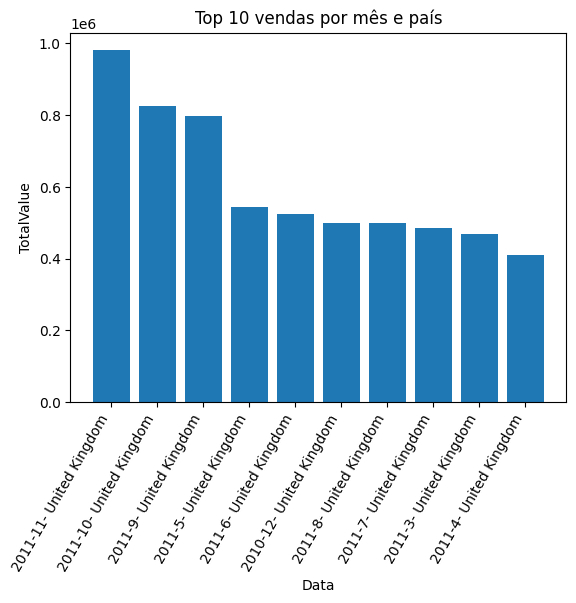

In [ ]:
df2Plot = pd.DataFrame
df2Plot = df_NoOutlier.groupby(['Month','Year','Country'])[['TotalValue']].sum().sort_values('TotalValue', ascending=False).reset_index().head(10)

df2Plot['Data'] = df2Plot.apply(lambda row: (f"{int(row['Year'])}-{int(row['Month'])}- {row['Country']}"), axis=1)
#df2Plot = df2Plot.sort_values('TotalValue')

# Plotar gráfico de barras
plt.bar(df2Plot['Data'], df2Plot['TotalValue'])

# Adicionar rótulos e título
plt.xlabel('Data')
plt.ylabel('TotalValue')
plt.title('Top 10 vendas por mês e país')
plt.xticks(rotation=60, ha='right')

# Exibir o gráfico
plt.show()

#10 - Cálculo do RFM

- R é a recência, diferença em dias da última compra do cliente e da última
compra disponível no conjunto de dados, que calcularam previamente.
- F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
- M é o ticket médio, ou seja, a média das compras feitas pelo cliente.

In [ ]:
df_NoOutlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalValue,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,2011


In [ ]:
df_NoOutlier.groupby(['InvoiceNo','CustomerID','InvoiceDate'])[['TotalValue']].sum().reset_index()

,InvoiceNo,CustomerID,InvoiceDate,TotalValue
0,536365,17850,2010-12-01 08:26:00,139.12
1,536366,17850,2010-12-01 08:28:00,22.20
2,536367,13047,2010-12-01 08:34:00,278.73
3,536368,13047,2010-12-01 08:34:00,70.05
4,536369,13047,2010-12-01 08:35:00,17.85
...,...,...,...,...
18554,581583,13777,2011-12-09 12:23:00,124.60
18555,581584,13777,2011-12-09 12:25:00,140.64
18556,581585,15804,2011-12-09 12:31:00,329.05
18557,581586,13113,2011-12-09 12:49:00,339.20


In [ ]:
df_RFM = df_NoOutlier.groupby(['InvoiceNo','CustomerID','InvoiceDate'])[['TotalValue']].sum().reset_index()

#Recência
df_RFM['Recencia'] = (lastData - df_RFM['InvoiceDate']).dt.days

#Frequência
frequencia = df_RFM.groupby('CustomerID').size().reset_index(name='Frequência')

#ticket médio
ticket_medio = df_RFM.groupby('CustomerID')['TotalValue'].mean().reset_index(name='TicketMedio')

#juntando as informações
rfm = pd.merge(frequencia, ticket_medio, on='CustomerID')
rfm = pd.merge(rfm, df_RFM[['CustomerID', 'Recencia', 'InvoiceNo']].drop_duplicates(), on='CustomerID')

rfm

,CustomerID,Frequência,TicketMedio,Recencia,InvoiceNo
0,12347,7,615.714286,366,537626
1,12347,7,615.714286,316,542237
2,12347,7,615.714286,246,549222
3,12347,7,615.714286,182,556201
4,12347,7,615.714286,129,562032
...,...,...,...,...,...
18524,18283,16,130.930000,8,579673
18525,18283,16,130.930000,3,580872
18526,18287,3,612.426667,201,554065
18527,18287,3,612.426667,58,570715
